In [185]:
import numpy as np
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

from power.ml_ops.data import get_pv_data, clean_pv_data


# Notebook of Marius

## Get and clean data

In [14]:
pv_df = pd.read_csv('../raw_data/1980-2022_pv.csv')
pv_df.head(2)

,_0-1,_0,local_time,electricity,irradiance_direct,irradiance_diffuse,temperature,source
0,NaN,315532800000,1980-01-01 01:00:00+01:00,0.0,0.0,0.0,-1.296,data/pv_data/1980_pv.csv
1,NaN,315536400000,1980-01-01 02:00:00+01:00,0.0,0.0,0.0,-1.216,data/pv_data/1980_pv.csv


In [15]:
pv_df.tail()

,_0-1,_0,local_time,electricity,irradiance_direct,irradiance_diffuse,temperature,source
376939,NaN,1672513200000,2022-12-31 20:00:00+01:00,0.0,0.0,0.0,12.240,data/pv_data/2022_pv.csv
376940,NaN,1672516800000,2022-12-31 21:00:00+01:00,0.0,0.0,0.0,11.968,data/pv_data/2022_pv.csv
376941,NaN,1672520400000,2022-12-31 22:00:00+01:00,0.0,0.0,0.0,11.953,data/pv_data/2022_pv.csv
376942,NaN,1672524000000,2022-12-31 23:00:00+01:00,0.0,0.0,0.0,11.993,data/pv_data/2022_pv.csv
376943,NaN,1672527600000,2023-01-01 00:00:00+01:00,0.0,0.0,0.0,11.945,data/pv_data/2022_pv.csv


In [16]:
x = pv_df.loc[0,'local_time']
print('x: ', x)
#dt.datetime.strptime("21 June, 2018", "%d %B, %Y")
dt.datetime.strptime(x, "%Y-%m-%d %H:%M:%S%z")

x:  1980-01-01 01:00:00+01:00


datetime.datetime(1980, 1, 1, 1, 0, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600)))

In [17]:
# load data
pv_df = pd.read_csv('../raw_data/1980-2022_pv.csv')

# drop columns
pv_df.drop(columns=['irradiance_direct','irradiance_diffuse','temperature',
                    'source','Unnamed: 0.1'], inplace=True)

# convert dtypes
pv_df.electricity = pv_df.electricity.astype(float)

#pv_df.local_time    = pd.to_datetime(pv_df.local_time) #
pv_df.local_time    = pv_df.local_time.apply(lambda x:
                                            dt.datetime.strptime(x,
                                            "%Y-%m-%d %H:%M:%S%z"))


pv_df['Unnamed: 0'] = pd.to_datetime(pv_df['Unnamed: 0'], unit='ms').dt.tz_localize('UTC')

# name columns
pv_df.rename(columns={'Unnamed: 0': 'utc_time'}, inplace=True)

# show
pv_df.head(2)

KeyError: "['Unnamed: 0.1'] not found in axis"

In [ ]:
pv_df.info()

In [ ]:
pv_df.tail(2)

In [18]:
# unique dates match the df length
print('pv_df number of rows: ', pv_df.shape[0])
print('Number of unique values:')
pv_df.nunique()

pv_df number of rows:  376944
Number of unique values:


_0-1                       0
_0                    376944
local_time            376944
electricity              892
irradiance_direct       1004
irradiance_diffuse       386
temperature            44061
source                    43
dtype: int64

In [19]:
# There are no NA values
pv_df.isna().sum()

_0-1                  376944
_0                         0
local_time                 0
electricity                0
irradiance_direct          0
irradiance_diffuse         0
temperature                0
source                     0
dtype: int64

In [20]:
print('Number of negative electricity values: ', len(pv_df[pv_df.electricity < 0.0]))
print('Number of electricity values above max. capacity (1 kw): ', len( pv_df[pv_df.electricity > 1.0]))

Number of negative electricity values:  0
Number of electricity values above max. capacity (1 kw):  0


In [21]:
def get_pv_data() -> pd.DataFrame:
    """
    Load raw data from local directory
    """
    df = pd.read_csv('../raw_data/1980-2022_pv.csv')
    print('# data loaded')
    return df


In [22]:
def clean_pv_data(pv_df: pd.DataFrame) ->pd.DataFrame:
    """
    Remove unnecessary columns and convert to right dtypes
    """
    # remove unnevessary columns
    pv_df.drop(columns=['irradiance_direct','irradiance_diffuse','temperature',
                    'source','Unnamed: 0.1'], inplace=True)

    # convert dtypes
    pv_df.electricity = pv_df.electricity.astype(float)

    pv_df.local_time    = pv_df.local_time.apply(lambda x:
                                            dt.datetime.strptime(x,
                                            "%Y-%m-%d %H:%M:%S%z")) # pd.to_datetime gives warning

    pv_df['Unnamed: 0'] = pd.to_datetime(pv_df['Unnamed: 0'],
                                         unit='ms').dt.tz_localize('UTC')
    # correct column names
    pv_df.rename(columns={'Unnamed: 0': 'utc_time'}, inplace=True)

    print('# data cleaned')
    return pv_df

In [23]:
df = get_pv_data()
df = clean_pv_data(df)
df.head()

# data loaded


KeyError: "['Unnamed: 0.1'] not found in axis"

## Select years

In [ ]:
df = get_pv_data()
df = clean_pv_data(df)
df.head(2)

In [24]:
st = 1980
en = 1980

start = "1980-01-01 00:00:00"
end   = "1982-12-31 23:00:00"
part_df = df[df.utc_time.between(start, end)]

print(part_df.head(1))
print(part_df.tail(1))

AttributeError: 'DataFrame' object has no attribute 'utc_time'

In [25]:
def select_years(df: pd.DataFrame, start=1980, end=1980)-> pd.DataFrame:
    """
    Select a subset of the cleaned data to process it further. Use this function
    to split into test set and train+validation set.
    Input:
      - cleaned dataframe from the raw data
      - start year (inclusive)
      - end year (inclusive)
    Output:
      - df between start and end year
    """
    start_point = f"{start}-01-01 00:00:00"
    end_point   = f"{end}-12-31 23:00:00"
    years_df = df[df.utc_time.between(start_point, end_point)]

    n_years = years_df['utc_time'].dt.year.nunique()
    print(f"# selected {n_years} years from {start} to {end}")

    return years_df


In [26]:
test_df = select_years(df, start=1980, end=1983)


AttributeError: 'DataFrame' object has no attribute 'utc_time'

In [27]:
test_df.head(2)

NameError: name 'test_df' is not defined

In [28]:
test_df.tail(2)

NameError: name 'test_df' is not defined

## Create statitics df

In [29]:
years_df = select_years(df, start=1980, end=1982)

years_df['hour_of_year'] = years_df.utc_time.\
                           apply(lambda x: x.strftime("%m%d%H"))

stats_df = years_df[['hour_of_year', 'electricity']]\
    .groupby(['hour_of_year']).agg(['mean','median','std','skew','min','max'])


AttributeError: 'DataFrame' object has no attribute 'utc_time'

In [30]:
def statistic_table(years_df: pd.DataFrame) -> pd.DataFrame:

    years_df = years_df.copy()
    years_df['hour_of_year'] = years_df.utc_time.\
                           apply(lambda x: x.strftime("%m%d%H"))

    stats_df = years_df[['hour_of_year', 'electricity']]\
    .groupby(['hour_of_year']).agg(['mean','median','std','skew',
                                    'min','max','count'])

    print('# calculated statistics for every hour of the year')

    return stats_df

In [31]:

years_df = select_years(df, start=1980, end=1982)
stats_df = statistic_table(years_df)

AttributeError: 'DataFrame' object has no attribute 'utc_time'

NameError: name 'stats_df' is not defined

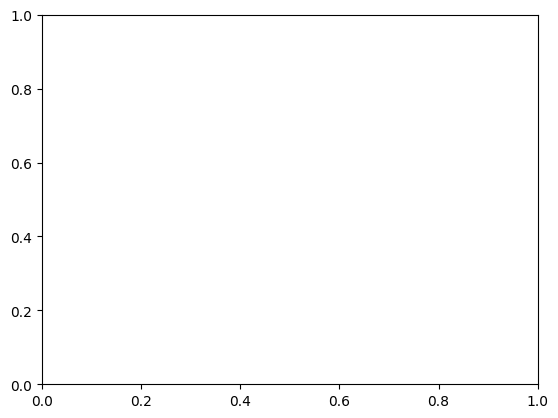

In [32]:
fig, ax = plt.subplots()
stats_df.loc['010100':'010223',(['electricity'], ['mean'])].plot(kind='bar',
                                                                 ax=ax,)
stats_df.loc['010100':'010223',(['electricity'], ['min','max'])].plot(ax=ax)

## Baseline model mean

In [114]:
years_df = select_years(df, start=1980, end=1982)
stats_df = statistic_table(years_df)

AttributeError: 'DataFrame' object has no attribute 'utc_time'

In [34]:
input_date = '2000-05-15 01:00:00' # "YEAR-MONTH-DAY HOUR:MIN:SECONDS"
input_timestamp = pd.Timestamp(input_date, tz='UTC')
input_timestamp

Timestamp('2000-05-15 01:00:00+0000', tz='UTC')

In [35]:
next24 = pd.date_range(
            start=input_timestamp,
            end=  input_timestamp + pd.Timedelta(hours=23),
            freq=pd.Timedelta(hours=1)).to_frame(index=False, name='utc_time')


In [36]:
#next24 = next24.to_frame(index=False, name='utc_time')
next24['hour_of_year'] = next24.utc_time.\
                           apply(lambda x: x.strftime("%m%d%H"))


In [37]:
stats_df = statistic_table(years_df)
stats_df.columns = stats_df.columns.droplevel(level=0)


NameError: name 'years_df' is not defined

In [38]:
print(input_date)
stats_pred = next24.join(stats_df, on='hour_of_year', how='inner', validate='one_to_one')
stats_pred

2000-05-15 01:00:00


NameError: name 'stats_df' is not defined

In [39]:
stats_pred.drop(columns='hour_of_year', inplace=True)
stats_pred.shape

NameError: name 'stats_pred' is not defined

In [40]:
def model_mean(X: pd.DataFrame, input_date: str) -> pd.DataFrame:

  input_timestamp = pd.Timestamp(input_date, tz='UTC')
  next24 = pd.date_range(
            start=input_timestamp,
            end=  input_timestamp + pd.Timedelta(hours=23),
            freq=pd.Timedelta(hours=1)).to_frame(index=False, name='utc_time')

  next24['hour_of_year'] = next24.utc_time.\
                           apply(lambda x: x.strftime("%m%d%H"))

  stats_df = statistic_table(years_df)
  stats_df.columns = stats_df.columns.droplevel(level=0)

  pred_df = next24.join(stats_df, on='hour_of_year',
                           how='inner', validate='one_to_one')

  pred_df.drop(columns='hour_of_year', inplace=True)

  return pred_df


In [41]:
years_df = select_years(df, start=1980, end=1982)

stats_pred = model_mean(years_df, '2000-05-15 01:00:00')

AttributeError: 'DataFrame' object has no attribute 'utc_time'

## Plots stats

NameError: name 'stats_pred' is not defined

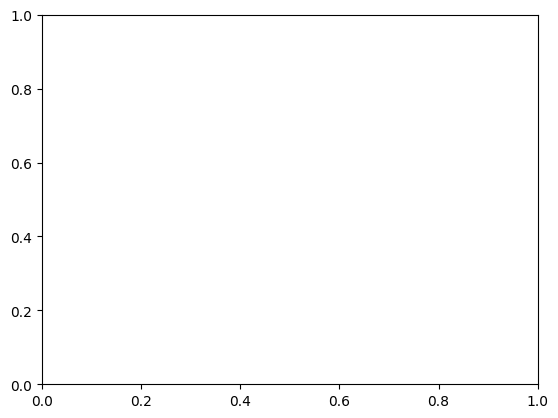

In [42]:
#plt.plot(stats_pred.mean)
fig, ax = plt.subplots()

hours = stats_pred.index

ax.step(hours, stats_pred['mean'].values,
        color='k',
        linewidth='2',
        label='mean')

ax.step(hours, stats_pred['min'].values,
        color='k',
        linestyle=':',
        label='min')

ax.step(hours, stats_pred['max'].values,
        color='k',
        linestyle=':',
        label='max')

lower_bound = stats_pred['mean'].values - stats_pred['std'].values
upper_bound = stats_pred['mean'].values + stats_pred['std'].values

ax.fill_between(hours, lower_bound, upper_bound, step='pre',
                color='gray',
                alpha=0.3,
                label='confidence')



ax.set_xlabel('hours')
ax.set_ylabel('statistics')
ax.set_ylim(0,1)
ax.legend()


## Prototype visualisation

In [165]:
from power.params import *
from power.ml_ops.data import get_data_with_cache
from pathlib import Path

In [172]:
query = f"""
        SELECT *
        FROM {GCP_PROJECT}.{BQ_DATASET}.processed_pv
        ORDER BY utc_time
    """

data_processed_cache_path = Path(LOCAL_DATA_PATH).joinpath("processed", f"processed_pv.csv")
data_processed_df = get_data_with_cache(
        gcp_project=GCP_PROJECT,
        query=query,
        cache_path=data_processed_cache_path,
        data_has_header=True
    )

data_processed_df.utc_time = pd.to_datetime(data_processed_df.utc_time,utc=True)
data_processed_df['cap_fac'] = data_processed_df.electricity / 0.9 * 100


Load data from local CSV...
✅ Data loaded, with shape (376944, 3)


In [173]:

today = '2000-05-15'
today_timestamp = pd.Timestamp(today, tz='UTC')

window_df= pd.date_range(
            start=today_timestamp - pd.Timedelta(days=2),
            end=  today_timestamp + pd.Timedelta(days=1),
            freq=pd.Timedelta(hours=1)).to_frame(index=False, name='utc_time')

window_df.head(2)

,utc_time
0,2000-05-13 00:00:00+00:00
1,2000-05-13 01:00:00+00:00


In [174]:
print(window_df.utc_time.dtype, data_processed_df.utc_time.dtype)

plot_df = pd.merge(window_df, data_processed_df, on='utc_time', how='inner')
plot_df.head(2)

datetime64[ns, UTC] datetime64[ns, UTC]


,utc_time,local_time,electricity,cap_fac
0,2000-05-13 00:00:00+00:00,2000-05-13 00:00:00+00:00,0.0,0.0
1,2000-05-13 01:00:00+00:00,2000-05-13 01:00:00+00:00,0.0,0.0


In [175]:


data_processed_df['hour_of_year'] = data_processed_df.utc_time.\
                           apply(lambda x: x.strftime("%m%d%H"))

stats_df = data_processed_df[['hour_of_year', 'cap_fac']]\
    .groupby(['hour_of_year']).agg(['mean','median','std','skew','min','max','count'])


stats_df.columns = stats_df.columns.droplevel(level=0)
stats_df.head(2)

,mean,median,std,skew,min,max,count
hour_of_year,,,,,,,
010100,0.0,0.0,0.0,0.0,0.0,0.0,43
010101,0.0,0.0,0.0,0.0,0.0,0.0,43


In [176]:
stats_df['max'].max()

100.0

In [177]:
plot_df['hour_of_year'] = plot_df.utc_time.\
                           apply(lambda x: x.strftime("%m%d%H"))

plot_df = pd.merge(plot_df, stats_df, on='hour_of_year', how='inner')

plot_df.head(2)

,utc_time,local_time,electricity,cap_fac,hour_of_year,mean,median,std,skew,min,max,count
0,2000-05-13 00:00:00+00:00,2000-05-13 00:00:00+00:00,0.0,0.0,051300,0.0,0.0,0.0,0.0,0.0,0.0,43
1,2000-05-13 01:00:00+00:00,2000-05-13 01:00:00+00:00,0.0,0.0,051301,0.0,0.0,0.0,0.0,0.0,0.0,43


In [217]:
plot_df['pred'] = plot_df.cap_fac

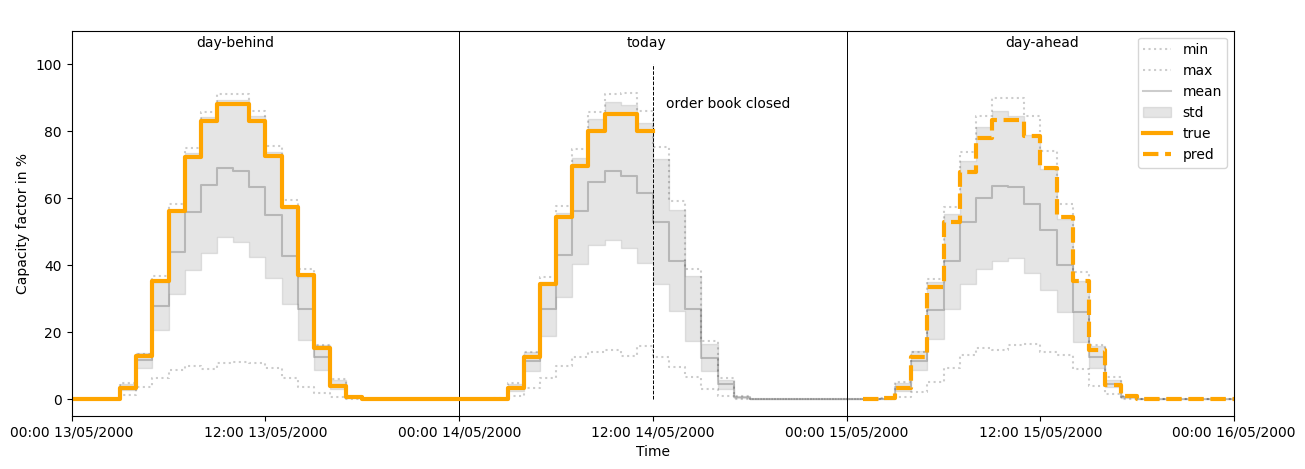

In [220]:
import matplotlib.dates as dates

fig, ax = plt.subplots(figsize=(15,5))

time = plot_df.utc_time.values

sep_future = today_timestamp
sep_past = today_timestamp - pd.Timedelta(days=1)
sep_order = today_timestamp - pd.Timedelta(hours=12)

# time
ax.axvline(sep_past, color='k', linewidth=0.7)
ax.axvline(sep_future, color='k', linewidth=0.7)
#ax.axvline(sep_order, color='k', linewidth=0.7, linestyle='--')
ax.vlines(sep_order, ymin=0, ymax=100, color='k', linewidth=0.7, linestyle='--')

# stats
alpha_stats = 0.2
ax.step(time, plot_df['min'].values, where='pre',
        color='k', linestyle=':', alpha=alpha_stats, label='min')
ax.step(time, plot_df['max'].values, where='pre',
        color='k', linestyle=':', alpha=alpha_stats, label='max')
ax.step(time, plot_df['mean'].values, where='pre',
        color='k', linestyle='-', alpha=alpha_stats, label='mean')

lower_bound = plot_df['mean'].values - 1 * plot_df['std'].values
upper_bound = plot_df['mean'].values + 1 * plot_df['std'].values
ax.fill_between(time, lower_bound, upper_bound, step='pre',
                color='gray',
                alpha=alpha_stats,
                label='std')

# true
current = 37 # current production data
ax.step(time[:current], plot_df.cap_fac.values[:current], where='pre',
        color='orange', linewidth=3, label='true')

# prediction
hori = -24
ax.step(time[hori:], plot_df.pred.values[hori:], where='pre',
        color='orange', linewidth=3, linestyle='--', label='pred')

# date ticks
ax.xaxis.set_major_locator(dates.HourLocator(byhour=range(24), interval=12, tz='UTC'))
ax.xaxis.set_major_formatter(dates.DateFormatter('%H:%M %d/%m/%Y'))

ax.set_xlim(today_timestamp - pd.Timedelta(days=2), today_timestamp + pd.Timedelta(days=1))
ax.set_ylim(-5,110.0)
ax.set_xlabel('Time')
ax.set_ylabel('Capacity factor in %')

ax.annotate('day-ahead',(0.77,0.9), xycoords='subfigure fraction')
ax.annotate('today',(0.48,0.9), xycoords='subfigure fraction')
ax.annotate('day-behind',(0.15,0.9), xycoords='subfigure fraction')
ax.annotate('order book closed',(0.51,0.77), xycoords='subfigure fraction')

ax.legend();


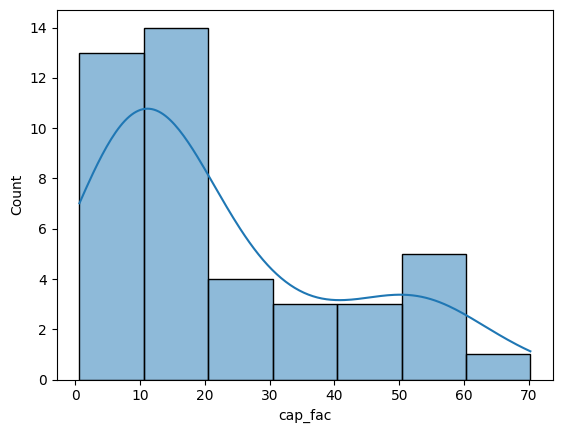

In [221]:
dist_cap_fac = data_processed_df[ data_processed_df.hour_of_year == '010612'].cap_fac #.plot(kind='hist')

sns.histplot(data=dist_cap_fac, stat='count', kde=True);

In [179]:
data_processed_df.head()


,utc_time,local_time,electricity,cap_fac,hour_of_year
0,1980-01-01 00:00:00+00:00,1980-01-01 00:00:00+00:00,0.0,0.0,010100
1,1980-01-01 01:00:00+00:00,1980-01-01 01:00:00+00:00,0.0,0.0,010101
2,1980-01-01 02:00:00+00:00,1980-01-01 02:00:00+00:00,0.0,0.0,010102
3,1980-01-01 03:00:00+00:00,1980-01-01 03:00:00+00:00,0.0,0.0,010103
4,1980-01-01 04:00:00+00:00,1980-01-01 04:00:00+00:00,0.0,0.0,010104
